<a href="https://colab.research.google.com/github/OmiWakode/unsupervised-learning/blob/main/Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks foundation
## Author: *Omi Wakode*
## TSF_TASK2: Prediction using unsupervised ML

## Problem Definition: 
##From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# EDA (Exploratory Data Analysis)

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset
iris_data = pd.read_csv("/content/drive/MyDrive/tsf-task2/Iris.csv")
iris_data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The data has a total of 150 samples

## Visualizing the number of samples in each species

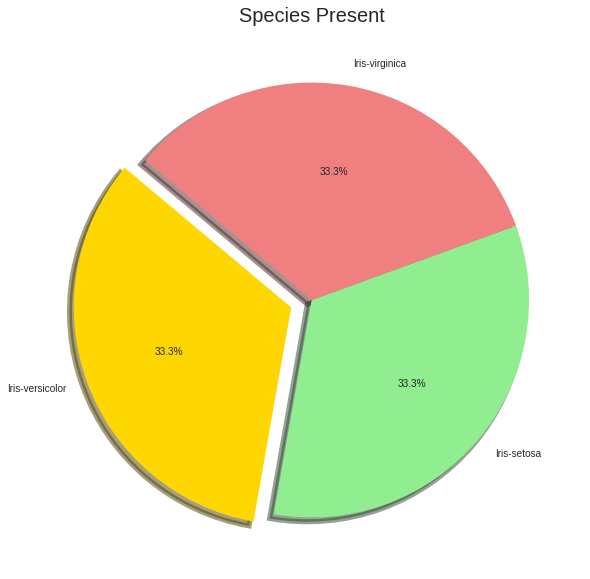

In [ ]:
font = {'size': 20}
explode = (0.1, 0, 0)

#Plotting the species value columns
iris_data.Species.value_counts().plot(figsize=(20,10),kind='pie', explode=explode,
                                      colors=['gold', 'lightgreen', 'lightcoral'],
                                    autopct='%1.1f%%', shadow=True,  startangle=140, wedgeprops = {'linewidth': 5})
plt.title('Species Present', fontdict={'fontsize': 20})
plt.rc('font', **font)
plt.ylabel(' ');


 ## Checking for Null values in the data

In [ ]:
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Found No NULL values

## Visualization of All the parameters

In [ ]:
font_size = 12 #@param{type: "slider", min: 10, max:20, step: 2}

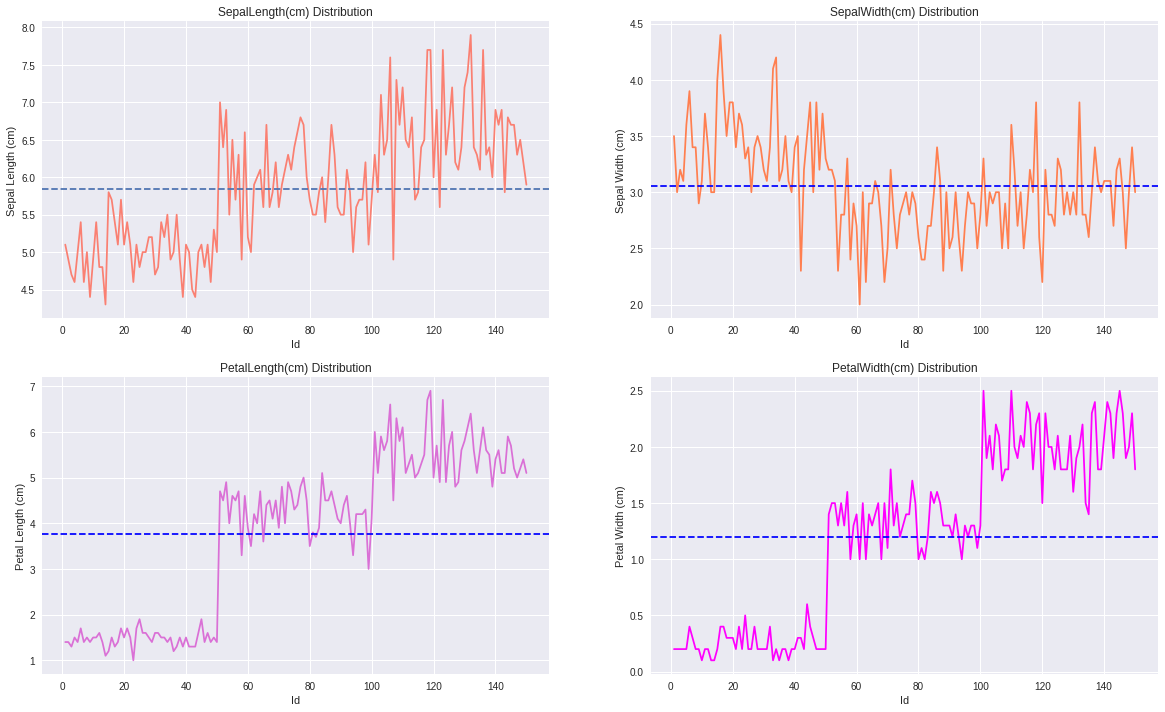

In [ ]:
font = {'size': font_size}

#Plotting using plt.subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
plt.rc('font', **font)

#Plotting for Sepal Length
ax[0,0].plot(iris_data.Id, iris_data.SepalLengthCm,color='salmon')
ax[0,0].set_title("SepalLength(cm) Distribution")
ax[0,0].set_xlabel('Id')
ax[0,0].set_ylabel('Sepal Length (cm)')
ax[0,0].axhline(iris_data.SepalLengthCm.mean(), ls='--')

#Plotting for Sepal Width
ax[0,1].plot(iris_data.Id, iris_data.SepalWidthCm,color='coral')
ax[0,1].set_title("SepalWidth(cm) Distribution")
ax[0,1].set_xlabel('Id')
ax[0,1].set_ylabel('Sepal Width (cm)')
ax[0,1].axhline(iris_data.SepalWidthCm.mean(), ls='--', color='blue')

#Plotting for Petal Length
ax[1,0].plot(iris_data.Id, iris_data.PetalLengthCm,color='orchid')
ax[1,0].set_title("PetalLength(cm) Distribution")
ax[1,0].set_xlabel('Id')
ax[1,0].set_ylabel('Petal Length (cm)')
ax[1,0].axhline(iris_data.PetalLengthCm.mean(), ls='--', color='blue')

#Plotting for Petal Width
ax[1,1].plot(iris_data.Id, iris_data.PetalWidthCm,color='Magenta')
ax[1,1].set_title("PetalWidth(cm) Distribution")
ax[1,1].set_xlabel('Id')
ax[1,1].set_ylabel('Petal Width (cm)')
ax[1,1].axhline(iris_data.PetalWidthCm.mean(), ls='--', color='blue');


## Finding the optimum number of clusters using the elbow method

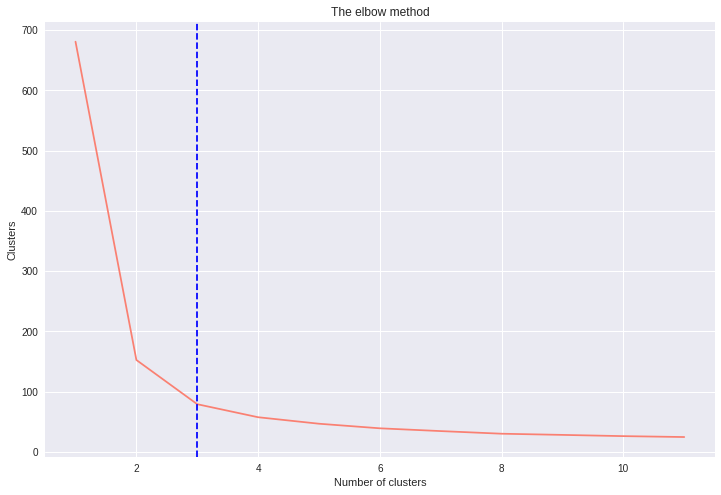

In [ ]:
from sklearn.cluster import KMeans
#Droping the Species Column
x = iris_data.drop('Species', axis=1)
x = x.drop('Id' ,axis = 1)

clusters = []

for i in range(1, 12):
    k_means = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    k_means.fit(x)
    clusters.append(k_means.inertia_)

plt.style.use('seaborn')
# Plotting to Visualise the elbow
plt.figure(figsize=(12,8))
plt.plot(range(1, 12), clusters, color='salmon')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Clusters'); # cluster sum of squares
plt.axvline(x=3, ls='--', color='blue')

## From the above graph we see that the elbow of the graph lies betweem 2 & 4. So choosing `3` as the optimum K size.

## Applying `KMeans()` classifier to the data set

In [ ]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
predicted_y = k_means.fit_predict(x)

iris_data['cluster'] = predicted_y
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


# Visualizing the clusters

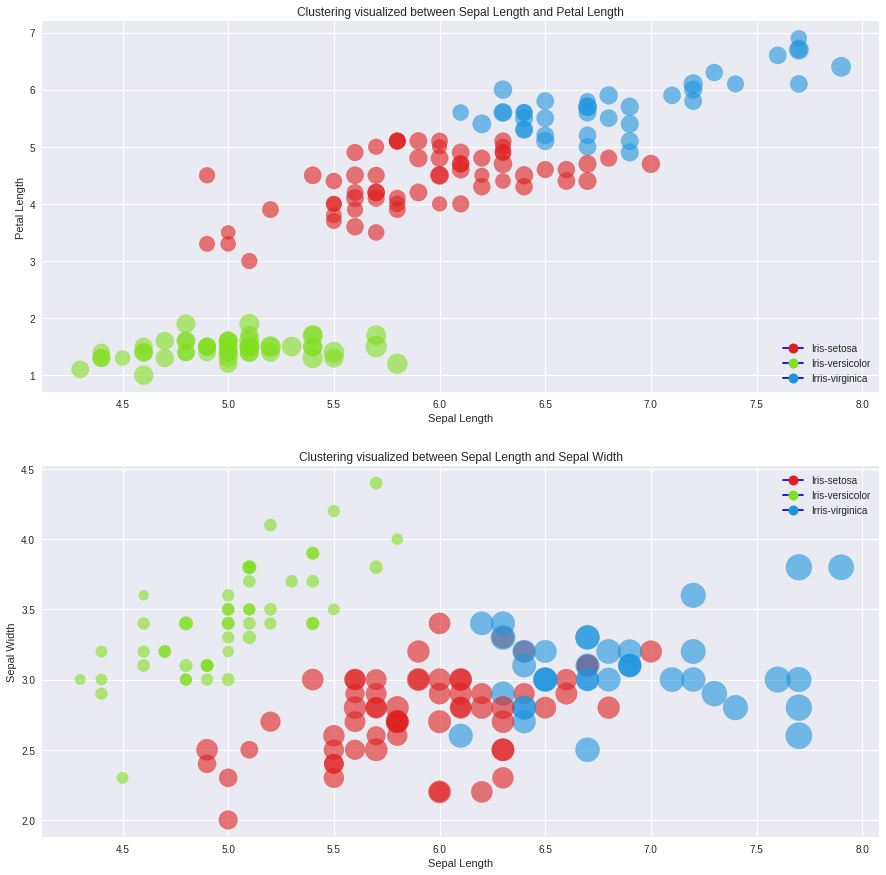

In [ ]:
import matplotlib.lines as lines
labels = k_means.labels_
centroids = k_means.cluster_centers_

cen_1 = [i[0] for i in centroids]
cen_2 = [i[1] for i in centroids]
iris_data['cen_1'] = iris_data.cluster.map({0:cen_1[0], 1:cen_1[1], 2:cen_1[2]})
iris_data['cen_2'] = iris_data.cluster.map({0:cen_2[0], 1:cen_2[1], 2:cen_2[2]})


colors = ['#DF2020', '#81DF20', '#2095DF']
iris_data['c'] = iris_data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(15,15))

ax1.scatter(iris_data.SepalLengthCm, iris_data.PetalLengthCm, c=iris_data.c,alpha = 0.6, s= iris_data.SepalWidthCm*100)
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Petal Length')
ax1.set_title('Clustering visualized between Sepal Length and Petal Length')

scatter2 = ax2.scatter(iris_data.SepalLengthCm, iris_data.SepalWidthCm, c=iris_data.c,alpha = 0.6, s= iris_data.PetalLengthCm*100)
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_title('Clustering visualized between Sepal Length and Sepal Width')
# create a list of legend elemntes
## markers / records

legends = ['Iris-setosa', 'Iris-versicolor', 'Irris-virginica']
legend_elements = [lines.Line2D([0], [0], marker='o', color='b', label='{}'.format(legends[i]), 
               markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# plot legend
ax1.legend(handles=legend_elements, loc='lower right');
ax2.legend(handles=legend_elements)


Thank you


---


